In [796]:
import json
import requests
import os
import threading
import re
from time import time
from nltk.corpus import stopwords
import nltk
from nltk import word_tokenize
import string
import pandas as pd
import numpy as np
import csv
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


In [797]:
#Contener todos los archivos de un carpeta 
archivosJson=os.listdir("primera/pdf_json")
print(len(archivosJson))

52070


In [759]:
def count_words(archivosJson):
    counts = [archivosJson.count(i) for i in archivosJson]
    return dict(list(zip(archivosJson, counts)))      

In [798]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def Hilo1Secuencial(diccionariototal):
    contador=0;
    diccionario={}
    for i in archivosJson:
        contador=contador+1
        if(contador<=52070):
            url="primera/pdf_json/"+i
            with open(url) as file:
                data = json.load(file)
                texto=""
                for entity in data["abstract"]:
                    Abstract=entity["text"]
                    texto=texto+Abstract
                    #Limpieza De Texto  para tranformar a minusculas
                    texto = texto.lower()
                    #print (texto)
                    texto=re.sub(r"[^a-zA-z0-9]"," ", texto) #preguntar si eliminamos los (_)
                    splitData=word_tokenize(texto)
                    #print(splitData)
                    #Eliminacion De Caracteres 
                    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
                    stripped = [re_punc.sub('', w) for w in splitData]
                    #print(stripped)
                    #AGREGACION AL SPLITDATA
                    splitData=stripped
                    splitData=[w for w in splitData if w not in stopwords.words("english")]
                    #Eiminar palabras Interrupcion
                    diccionario = count_words(splitData)
                    sorted_counts = sorted(diccionario.items(), key=lambda pair: pair[1], reverse=True)
                    diccionariototal.update(diccionario)
    return(diccionariototal)

[nltk_data] Downloading package punkt to /home/usuario/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/usuario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [799]:
TiempoDiccionarioTotal = time()
diccionariototal={}
diccionariototalSecuencial={}
diccionariototalSecuencial = Hilo1Secuencial(diccionariototal)

TiempoDiccionarioFinal = time() - TiempoDiccionarioTotal

In [800]:

sorted_counts = sorted(diccionariototal.items(), key=lambda pair: pair[1], reverse=True)
vocabulario={}
for word, count in sorted_counts:
    if (count >=10) and (word!='') and (word!='l'):
        vocabulario[word]=count
        
print("Numero de palabras con ocurrencias mayor a 10: "+str(len(vocabulario)))
sorted_counts = sorted(vocabulario.items(), key=lambda pair: pair[1], reverse=True)
for word, count in sorted_counts:
    print("{}\t{}".format(word, count))


Numero de palabras con ocurrencias mayor a 10: 612
biofilm	61
pml	58
srsf7	56
s309	42
skewness	40
sarco	36
jbp3	35
pnuts	33
restricta	32
bspc	32
tim	31
atp1a1	31
tatouage	31
pce	29
ifi6	29
crm	28
rosavirus	28
mamif	27
birar118g	27
nbs	26
wdr82	25
elp	24
hcd81	24
ketamine	24
xkb	23
ul36	23
trim	22
wkh	22
g64s	22
trims	22
jgt	22
cfr	21
nsp1a	21
cenp	21
harmonic	21
pmal	21
lws	21
lipin1	21
myelin	20
ev7	20
trpv1	20
ape	20
crossalign	20
upd	20
iyong	20
wbv	20
ccr5	19
mtf1	19
dihydropyrimidinase	19
rnaemia	19
mtz	19
usp17	19
pga	18
repa	18
atgus	18
prdez	18
ofscs	18
stmv	18
tp5	18
rpa	17
een	17
diub	17
adam17	17
g6pd	17
blv	17
opn	17
pq	17
kdke	17
opa1	17
100nm	17
actinin	17
caga	17
aptb	17
am2	17
pbvs	16
cam	16
autophagy	16
clarithromycin	16
drones	16
akap7	16
pi3v	16
ahds	16
stifler	16
dqg	16
fenofibrate	16
rdev	16
nans	16
amifn	16
pedvpt	16
icgn	16
simulations	15
casei	15
bosque	15
tm	15
pev	15
nb	15
aki	15
seds	15
cpv	15
hvs	15
silvestrol	15
tbtv	15
ssi	15
hcvcp	15
crystallin	15
shlh	15

In [801]:

def count_words2(texto,idTexto):
    counts = {}
    cont=0
    for word1 in vocabulario:
        cont=0
        for word2 in texto:
            if word2==word1:
                cont+=1
                counts[word1]=cont

    return counts

def count_words3(texto,idTexto):
    counts = {}
    cont=0
    for word1 in vocabulario:
        cont=0
        for word2 in texto:
            if word2==word1:
                cont+=1
                counts[word1,idTexto]=cont
    return counts

In [802]:
def Hilo21Secuencial(matriz,matriz2):
    contador=0;
    diccionario={}
    diccionario2={}
    for i in archivosJson:
        contador=contador+1
        if(contador<=52070):
            url="primera/pdf_json/"+i
            with open(url) as file:
                data = json.load(file)
                idTexto=i
                texto=""
                for entity in data["abstract"]:
                    Abstract=entity["text"]
                    texto=texto+Abstract
                    #Limpieza De Texto  para tranformar a minusculas
                    texto = texto.lower()
                    #print (texto)
                    texto=re.sub(r"[^a-zA-z0-9]"," ", texto) #preguntar si eliminamos los (_)
                    splitData=word_tokenize(texto)
                    #Eliminacion De Caracteres 
                    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
                    stripped = [re_punc.sub('', w) for w in splitData]
                    #AGREGACION AL SPLITDATA
                    splitData=stripped
                    splitData=[w for w in splitData if w not in stopwords.words("english")]
                    #Eiminar palabras Interrupcion
                    diccionario = count_words2(splitData,idTexto)
                    diccionario2 = count_words3(splitData,idTexto)
                    matriz.update(diccionario)
                    matriz2.update(diccionario2)
                    
    return(matriz,matriz2)
                 

In [803]:
TiempoMatrizTerminoDocumento = time()

matriz={}
matriz2={}
matriz ,matriz2 =Hilo21Secuencial(matriz,matriz2)

print("Matriz Termino-Documento-Frecuencia Largo: "+str(len(matriz2)))
sorted_counts = sorted(matriz2.items(), key=lambda pair: pair[1], reverse=True)
for word, count in sorted_counts:
    print("{}\t{}".format(word, count))


matrizPalabras=''
sorted_counts = sorted(matriz.items(), key=lambda pair: pair[1], reverse=True)
for word, count in sorted_counts:
    matrizPalabras=matrizPalabras+' '+word

TiempoMatrizTerminoDocumentoFinal = time() - TiempoMatrizTerminoDocumento

Matriz Termino-Documento-Frecuencia Largo: 13679
('autophagy', '6f1f4714674c1dbe218971f0fcb9cd986e6f6a4f.json')	96
('sars', '6e4e0f758769308e284f43925e1533896943070e.json')	87
('g6pd', '0435b8c5081db34e2c6c62b8f7b998927fa28776.json')	62
('biofilm', '49f489058759717ed1298db97b5c3ecac12e7687.json')	61
('ifitm', 'fb9006ed6379f4b0712537d159bb23aa1fe6b6a3.json')	60
('pml', '21ce80c47dc75478e589ca52df741f47d516b017.json')	58
('srsf7', '47a14293c2dedaef4d47052573868fdc2cf4d447.json')	56
('des', '973a864f672fcd3e3d7a1b1f043b04d28163b813.json')	50
('f1000', 'ff39ae6bd4032d99088bad7743f0e8e7834dd9ab.json')	48
('s309', '6e4e0f758769308e284f43925e1533896943070e.json')	42
('sars', 'd19048e85f4acc8c7df1cc811916ebb57e771aee.json')	40
('sgta', 'b18ff7b65ed56a87c0c0de1ee312b8a0ddb51e4c.json')	40
('skewness', '5d19d9dfc3b5ba09243665cfaa3f652b06fff3ea.json')	40
('ifit1', 'fb9006ed6379f4b0712537d159bb23aa1fe6b6a3.json')	39
('des', 'cec8f7ba3663a2dccac1584016377462de840950.json')	38
('sarco', '973a864f672f

('zinc', 'daea831947b6f43a61d773c5458e77fcbbf3f2ef.json')	6
('crossalign', '43b6759b989971eb0410fd45e7f97750183ed1bf.json')	6
('ppg612', '408c98fbba5d5584cc7fda96ec9b307d1cbd73bc.json')	6
('sars', 'fb048d4250c6ef602d310686f95071f3b9bd3f59.json')	6
('sars', '701f99a60be1896332a40fe67140ad784e6f0d69.json')	6
('tm', 'a68721d234eacc8dd31ff6a97616d8091f61e912.json')	6
('sars', '443520014fd6d089fdb345625aeefe1b535f1c83.json')	6
('calves', 'ab24aa831b3e9ab444faad74ff72f3425df1612c.json')	6
('hajj', '98426efcca67bd6594c7f8417c6063102342ea1c.json')	6
('sars', 'f97041e7df6bd951fb92f5b9c9ccd99ba55f0b2c.json')	6
('sars', 'b7f053f7fe63869f0a7f4560b4209b8ff9dcadfd.json')	6
('autophagy', '5207446fcfbafd3f0616443d32c2590ab0446def.json')	6
('zinc', 'ab4df5575634f1c47d45c62ef73c0cd243cc3a0c.json')	6
('des', '9286c3e312b69aba322f93a7d158747267f00497.json')	6
('sars', '17643a57b92abf0d6635d308949e78de2ecc7f66.json')	6
('ph1n1', '72e9038e9738f001e0b050d11f9b05a6376919bc.json')	6
('sars', '8d469a4a8419ce08f

('sars', 'f0ed866010f1b18f9e8de529501d2957bd5ca019.json')	3
('ci', '9d841b824ae2621149ed1404cd9d07f74346fae6.json')	3
('sars', '375db0507ef4c154a827c5e40a2450a3b4288d76.json')	3
('ab', 'c46b51e5657b05d7af97e9006d2033353ccd9512.json')	3
('sars', '1bf5c849aed524f5e7112621738a6174f004803f.json')	3
('les', '914ac27a64e06952eeefd490cfdb111c04f202c8.json')	3
('sars', '60081af7cc91d270d05e6cb45285578f86c918fb.json')	3
('fcv', 'd517eb3ac96e7edc94b9896816b308cdc659e3db.json')	3
('zinc', '1803065327394f7f38931024cd4219d47f5f7d8b.json')	3
('ci', '1fc9cec3da95dfc65813fa7229570ec462010c46.json')	3
('cpv', '45d421f19615b936de0527809bb71e12be89fa7c.json')	3
('ci', 'dfb0fedbeed56bd2b795a67faab28295afc14c96.json')	3
('tgev', '9bf5b00e1c650f64a13fc1189b25c05070bb00d2.json')	3
('sars', '66a57c2ab4f33de22787725089cb508573481a4e.json')	3
('ci', '4bdb7bd65806dc80bb17f0ab669ff6bbc7abc142.json')	3
('sars', 'cc31ceffd9e9144741030a00dff90c1a5952243b.json')	3
('hfmd', 'ddc769d4f334034384d31dda8a4d76bc30f52dd3.js

('sars', '4873e7cc844409bdcf73753cdaab4e9417e4da12.json')	2
('sars', 'af73a72bf3710e42bc05c84f922411f9558758d7.json')	2
('vigilancia', '87182c97acbc46dbf021c8cad2efc0544558d608.json')	2
('muscle', '6917631a37ea88f367ce3c017e482958e10e1c6b.json')	2
('les', 'a9b8ebf91135473eb1874921283551d45975b9f0.json')	2
('los', '52749ba0ecf6b92ab0fe01548197db8c73e94eda.json')	2
('ci', '52749ba0ecf6b92ab0fe01548197db8c73e94eda.json')	2
('les', 'e6101d200a980bb2dbc327768fdd5acfb02a49e7.json')	2
('ci', 'a20dad1dae885e38b8aeadb93c22d14a54c6388a.json')	2
('sars', 'f6bd4b31d9355ac4cce8f53bf20ff4200803c7d7.json')	2
('stat1', '2555815300f73d37e4e984f3ba05ae4d005ef3f2.json')	2
('sars', '3b8d4c358caa29e704184f7ca09388fb6e6eb457.json')	2
('sars', '6d4c75d6c089ec27a4e019c0ea659ab27662d163.json')	2
('calves', '68ab2a720f3d51461b6f10b365425de6d7b60689.json')	2
('ci', '922ebd7d82d6563c70d4cdb9501cfd26bc719cdd.json')	2
('rv', '5202b316da8c851c633591ddf26594c34713bb2d.json')	2
('sars', '2d14474e1e53daf13260f8d1c16a96

('sars', '63e9ade5fdcb2903eeac1679236751888f47f883.json')	1
('sars', '1857e81fd7437da01ba89668fe520b937c844c79.json')	1
('camp', '232dc9f3baa927facbe91722ae717e0738a73981.json')	1
('sars', 'c05b1349d118b8d75eb1e86d5d31132d5f3fb186.json')	1
('zinc', 'fca4772bf9a088376d86d549e861c7fcb78c8b3c.json')	1
('ci', '1c6f1888177420011ff0c6e714490bb9216898d9.json')	1
('ci', 'cac851f6bb322314ff1ddadd68dee97984daefca.json')	1
('sars', '3c8014c708cbb661c613b0ccbcf263a2d87e5298.json')	1
('sars', '6dedf2c8c110d612ad3e7ae4a3882818cb6289dc.json')	1
('pancreatic', '63a2198519fa76566b6829554c213d567cb75bff.json')	1
('calves', '0435c8ed05adee4d3e05be49c31476eec8cb1b03.json')	1
('camp', '6203b7c7808aac525f83c3cc7d0107cf90344259.json')	1
('sars', '2ba93d76780bdb2d46d5d72cf87dfafc66720e4a.json')	1
('sars', '2437ecdfe29ce5195079af809de646e9e1e1350a.json')	1
('zinc', '66a268ec094c120ea3c4dfeedfeacab4494c50f6.json')	1
('myelin', '29af7ef7c5b8bfed29d7c4f545aa08974b3864f7.json')	1
('sars', '35dae72d35af33cfd17e5154

In [804]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
def computeTFIDF(docs):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(docs)
    feature_names = vectorizer.get_feature_names()
    dense = vectors.todense()
    denselist = dense.tolist()
    df = pd.DataFrame(denselist, columns=feature_names, 
                  index=['covid19', 'doc_real1', 'doc_real2', 'doc_fake1', 'doc_fake2'])
    display(df.head())
    display(df.tail())
    return denselist

In [805]:
from sklearn.metrics.pairwise import cosine_similarity
def palabrasTextoLimpio(url):
    with open(url,"r") as f:
        texto=f.read()
        #texto = open(f, encoding="utf8")
        texto = texto.lower()
        texto=re.sub(r"[^a-zA-z0-9]"," ", texto)
        splitData=word_tokenize(texto)
        #Eliminacion De Caracteres 
        re_punc = re.compile('[%s]' % re.escape(string.punctuation))
        stripped = [re_punc.sub('', w) for w in splitData]
        #AGREGACION AL SPLITDATA
        splitData=stripped
        splitData=[w for w in splitData if w not in stopwords.words("english")]
        textoLimpio=splitData 
    return textoLimpio


def obtienePalabras(textoSplit):
    palabras=''
    for i in range(0,len(textoSplit)):
        palabras=palabras+' '+textoSplit[i]
    return palabras


def obtieneCosine(tfidf):
    similaridad=cosine_similarity(tfidf)
    return similaridad

In [806]:
import pandas as pd
import numpy as np
import csv
def diccionarioLista(dicc):
    lista=list()
    sorted_counts = sorted(dicc.items(), key=lambda pair: pair[1], reverse=True)
    for word, count in sorted_counts:
        palabra=(word,count)
    lista.append(palabra)
    return lista

In [807]:
def creacionMapaDeCalor(dato):
    import seaborn as sns
    import pandas as pd
    import numpy as np
    print("Creacion Mapa De Calor")
    sns.heatmap(dato,center=0,cmap='Blues_r',annot=True,fmt='.3f')

                               Matriz TFIDF


,000,04,10,100nm,12,13,138,14,15,1502,...,xp,yc2014,years,yet,zbtrim25,zinc,zlwk,zodiac,zoonotic,zorginfecties
covid19,0.000000,0.000000,0.00000,0.040452,0.000000,0.000000,0.000000,0.000000,0.000000,0.040452,...,0.040452,0.040452,0.000000,0.000000,0.040452,0.040452,0.040452,0.040452,0.000000,0.040452
doc_real1,0.000000,0.018037,0.00000,0.000000,0.000000,0.000000,0.018037,0.014552,0.000000,0.000000,...,0.000000,0.000000,0.018037,0.018037,0.000000,0.000000,0.000000,0.000000,0.018037,0.000000
doc_real2,0.033235,0.000000,0.06647,0.000000,0.000000,0.000000,0.000000,0.053627,0.026814,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_fake1,0.000000,0.000000,0.00000,0.000000,0.073043,0.073043,0.000000,0.000000,0.058931,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_fake2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,000,04,10,100nm,12,13,138,14,15,1502,...,xp,yc2014,years,yet,zbtrim25,zinc,zlwk,zodiac,zoonotic,zorginfecties
covid19,0.000000,0.000000,0.00000,0.040452,0.000000,0.000000,0.000000,0.000000,0.000000,0.040452,...,0.040452,0.040452,0.000000,0.000000,0.040452,0.040452,0.040452,0.040452,0.000000,0.040452
doc_real1,0.000000,0.018037,0.00000,0.000000,0.000000,0.000000,0.018037,0.014552,0.000000,0.000000,...,0.000000,0.000000,0.018037,0.018037,0.000000,0.000000,0.000000,0.000000,0.018037,0.000000
doc_real2,0.033235,0.000000,0.06647,0.000000,0.000000,0.000000,0.000000,0.053627,0.026814,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_fake1,0.000000,0.000000,0.00000,0.000000,0.073043,0.073043,0.000000,0.000000,0.058931,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_fake2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Matriz de Similaridades
[[1.00000000e+00 3.97901792e-03 6.02994633e-04 0.00000000e+00
  0.00000000e+00]
 [3.97901792e-03 1.00000000e+00 2.57712169e-01 9.30523017e-02
  1.53065608e-01]
 [6.02994633e-04 2.57712169e-01 1.00000000e+00 2.84201955e-02
  6.00388634e-02]
 [0.00000000e+00 9.30523017e-02 2.84201955e-02 1.00000000e+00
  3.03231624e-02]
 [0.00000000e+00 1.53065608e-01 6.00388634e-02 3.03231624e-02
  1.00000000e+00]]
Porcentaje similaridad de los Documentos
[0.397901792497507, 0.06029946325536023, 0.0, 0.0]
Matriz Describe MTDF
                  0
count  13679.000000
mean       3.933986
std        4.329307
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       96.000000
Creacion Mapa De Calor


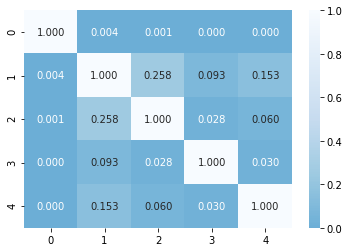

In [808]:
import pandas as pd
TiempoTFIDF = time()

textoreal1Split=palabrasTextoLimpio("realNew1.txt")
textoreal2Split=palabrasTextoLimpio("realNew2.txt")

textofake1Split=palabrasTextoLimpio("fakeNew1.txt")
textofake2Split=palabrasTextoLimpio("fakeNew2.txt")

txtreal1=obtienePalabras(textoreal1Split)
txtreal2=obtienePalabras(textoreal2Split)

txtfake1=obtienePalabras(textofake1Split)
txtfake2=obtienePalabras(textofake2Split)

documents = [matrizPalabras, txtreal1, txtreal2, txtfake1, txtfake2]

print("                               Matriz TFIDF")
tfidf= computeTFIDF(documents)

similaridad=obtieneCosine(tfidf)

porcentajeSimilaridad=list()

for i in range(0,1):
    suma=0
    for j in range(1,len(similaridad)):
        porcentajeSimilaridad.append(similaridad[i][j]*100)
  

print("Matriz de Similaridades")
print(similaridad)


print("Porcentaje similaridad de los Documentos")
print(porcentajeSimilaridad)
    
vocabularioFrecuencia=diccionarioLista(vocabulario)
matrizTDFFrecuencia=diccionarioLista(matriz2)

documentosTerminos=list()
documentosTerminos.append(len(matriz2))
documentosTerminos.append(len(matriz))

matrizPd=pd.Series(matriz2)
df = pd.DataFrame(matrizPd)
tamMatrizMB=(df.describe())
print("Matriz Describe MTDF")
print(tamMatrizMB)
with open("VocabularioFrecuenciaSecuencial.csv", 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(vocabularioFrecuencia)

np.savetxt("DocumentosTerminosSecuencial.csv",documentosTerminos)
np.savetxt("TamMatrizMBSecuencial.csv",tamMatrizMB)
with open("MatrizTermDocFrecSecuencial.csv", 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(matrizTDFFrecuencia)

np.savetxt("SimilaridadesSecuencial.csv",similaridad)
creacionMapaDeCalor(similaridad)
np.savetxt("PorcentajeSimilaridadesSecuencial.csv",porcentajeSimilaridad)

TiempoTFIDFFinal = time() - TiempoTFIDF



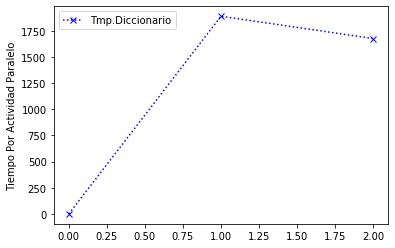

[0.5950303077697754, 1887.7178809642792, 1674.562597990036]
Tiempo Secuencial: 3562.8755 segundos.


In [809]:
from pylab import *
tiemposSecuencial = [TiempoTFIDFFinal,TiempoMatrizTerminoDocumentoFinal,TiempoDiccionarioFinal]
#plt.plot(tiempos)   # Dibuja el gráfico
plt.plot(tiemposSecuencial, marker='x', linestyle=':', color='b', label = "Tmp.Diccionario")
plt.legend(loc="upper left")

plt.ylabel("Tiempo Por Actividad Paralelo")   # Inserta el título del eje Y
plt.show()
print(tiemposSecuencial)
print("Tiempo Secuencial: %.4f segundos." % (tiemposSecuencial[0]+tiemposSecuencial[1]+tiemposSecuencial[2]))


Text(0.5, 1.0, 'Tiempos Por Actividad ')

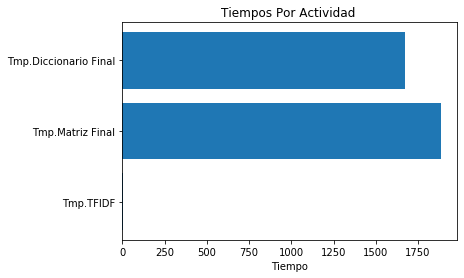

In [810]:
actividad = ("Tmp.TFIDF", "Tmp.Matriz Final", "Tmp.Diccionario Final")
posicion_y = np.arange(len(actividad))
plt.barh(posicion_y, tiemposSecuencial, align = "center")
plt.yticks(posicion_y, actividad)
plt.xlabel('Tiempo')
plt.title("Tiempos Por Actividad ")

In [ ]:
#Paralelo

In [909]:


import json
import requests
import os
import threading
import re
from time import time
from nltk.corpus import stopwords
import nltk
from nltk import word_tokenize
import string
import multiprocessing

#Contener todos los archivos de un carpeta 
archivosJson=os.listdir("primera/pdf_json")
print(len(archivosJson))

52070


In [918]:
def LeeArchivos(numDatos):
  contador=0;
  textos=list()
  for i in archivosJson:
    contador=contador+1
    if(contador>numDatos and contador<=numDatos+6508):
      url="primera/pdf_json/"+i
      with open(url) as file:
        text=list()
        data = json.load(file)
        texto=""
        for entity in data["abstract"]:
          Abstract=entity["text"]
          texto=texto+Abstract
          #Limpieza De Texto  para tranformar a minusculas
          texto = texto.lower()
          texto=re.sub(r"[^a-zA-z0-9]"," ", texto) #preguntar si eliminamos los (_)
      textos.append(texto)
  return textos  

In [919]:
#Leemos todos los archivos Json y los guardamos en una lista
textos=list()
numDatos=[0,6508,13016,19524,26032,32540,39048,45556]
numProcesos=8
pool = multiprocessing.Pool(numProcesos)
textos=pool.map(LeeArchivos,numDatos)
pool.close()
pool.join()

print(len(textos))

8


In [920]:
def count_words(archivosJson):
    counts = [archivosJson.count(i) for i in archivosJson]
    return dict(list(zip(archivosJson, counts)))   

In [921]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def Hilo1(matriz):
  diccionario={}
  diccionario2={}
  idHilo=0
  largoTextos=len(textos[idHilo])
  indiceIdtexto=idHilo*largoTextos
  for i in range(0,largoTextos):
    idTexto=(indiceIdtexto+i)+1
    splitData=word_tokenize(textos[idHilo][i])
    #Eliminacion De Caracteres 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in splitData]
    #AGREGACION AL SPLITDATA
    splitData=stripped
    splitData=[w for w in splitData if w not in stopwords.words("english")]
    #Eiminar palabras Interrupcion
    diccionario = count_words(splitData)
    matriz.update(diccionario)
                 
def Hilo2(matriz):
  diccionario={}
  idHilo=1
  largoTextos=len(textos[idHilo])
  indiceIdtexto=idHilo*largoTextos
  for i in range(0,largoTextos):
    idTexto=(indiceIdtexto+i)+1
    splitData=word_tokenize(textos[idHilo][i])
    #Eliminacion De Caracteres 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in splitData]
    #AGREGACION AL SPLITDATA
    splitData=stripped
    splitData=[w for w in splitData if w not in stopwords.words("english")]
    #Eiminar palabras Interrupcion
    diccionario = count_words(splitData)
    matriz.update(diccionario)

def Hilo3(matriz):
  diccionario={}
  idHilo=2
  largoTextos=len(textos[idHilo])
  indiceIdtexto=idHilo*largoTextos
  for i in range(0,largoTextos):
    idTexto=(indiceIdtexto+i)+1
    splitData=word_tokenize(textos[idHilo][i])
    #Eliminacion De Caracteres 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in splitData]
    #AGREGACION AL SPLITDATA
    splitData=stripped
    splitData=[w for w in splitData if w not in stopwords.words("english")]
    #Eiminar palabras Interrupcion
    diccionario = count_words(splitData)
    matriz.update(diccionario)

def Hilo4(matriz):
  diccionario={}
  idHilo=3
  largoTextos=len(textos[idHilo])
  indiceIdtexto=idHilo*largoTextos
  for i in range(0,largoTextos):
    idTexto=(indiceIdtexto+i)+1
    splitData=word_tokenize(textos[idHilo][i])
    #Eliminacion De Caracteres 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in splitData]
    #AGREGACION AL SPLITDATA
    splitData=stripped
    splitData=[w for w in splitData if w not in stopwords.words("english")]
    #Eiminar palabras Interrupcion
    diccionario = count_words(splitData)
    matriz.update(diccionario)

def Hilo5(matriz):
  diccionario={}
  idHilo=4
  largoTextos=len(textos[idHilo])
  indiceIdtexto=idHilo*largoTextos
  for i in range(0,largoTextos):
    idTexto=(indiceIdtexto+i)+1
    splitData=word_tokenize(textos[idHilo][i])
    #Eliminacion De Caracteres 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in splitData]
    #AGREGACION AL SPLITDATA
    splitData=stripped
    splitData=[w for w in splitData if w not in stopwords.words("english")]
    #Eiminar palabras Interrupcion
    diccionario = count_words(splitData)
    matriz.update(diccionario)

def Hilo6(matriz):
  diccionario={}
  idHilo=5
  largoTextos=len(textos[idHilo])
  indiceIdtexto=idHilo*largoTextos
  for i in range(0,largoTextos):
    idTexto=(indiceIdtexto+i)+1
    splitData=word_tokenize(textos[idHilo][i])
    #Eliminacion De Caracteres 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in splitData]
    #AGREGACION AL SPLITDATA
    splitData=stripped
    splitData=[w for w in splitData if w not in stopwords.words("english")]
    #Eiminar palabras Interrupcion
    diccionario = count_words(splitData)
    matriz.update(diccionario)

def Hilo7(matriz):
  diccionario={}
  idHilo=6
  largoTextos=len(textos[idHilo])
  indiceIdtexto=idHilo*largoTextos
  for i in range(0,largoTextos):
    idTexto=(indiceIdtexto+i)+1
    splitData=word_tokenize(textos[idHilo][i])
    #Eliminacion De Caracteres 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in splitData]
    #AGREGACION AL SPLITDATA
    splitData=stripped
    splitData=[w for w in splitData if w not in stopwords.words("english")]
    #Eiminar palabras Interrupcion
    diccionario = count_words(splitData)
    matriz.update(diccionario)

def Hilo8(matriz):
  diccionario={}
  idHilo=7
  largoTextos=len(textos[idHilo])
  indiceIdtexto=idHilo*largoTextos
  for i in range(0,largoTextos):
    idTexto=(indiceIdtexto+i)+1
    splitData=word_tokenize(textos[idHilo][i])
    #Eliminacion De Caracteres 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in splitData]
    #AGREGACION AL SPLITDATA
    splitData=stripped
    splitData=[w for w in splitData if w not in stopwords.words("english")]
    #Eiminar palabras Interrupcion
    diccionario = count_words(splitData)
    matriz.update(diccionario)

[nltk_data] Downloading package punkt to /home/usuario/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/usuario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [922]:
from time import time
TiempoDiccionarioTotalParalelo = time()
##Calcular tiempo de porcesamiento
diccionariototal={}


hilo1 = threading.Thread(target=Hilo1(diccionariototal))
hilo2 = threading.Thread(target=Hilo2(diccionariototal))
hilo3 = threading.Thread(target=Hilo3(diccionariototal))
hilo4 = threading.Thread(target=Hilo4(diccionariototal))
hilo5 = threading.Thread(target=Hilo5(diccionariototal))
hilo6 = threading.Thread(target=Hilo6(diccionariototal))
hilo7 = threading.Thread(target=Hilo7(diccionariototal))
hilo8 = threading.Thread(target=Hilo8(diccionariototal))

hilo1.start()  
hilo2.start() 
hilo3.start() 
hilo4.start() 
hilo5.start() 
hilo6.start()
hilo7.start() 
hilo8.start() 


hilo1.join() 
hilo2.join() 
hilo3.join() 
hilo4.join() 
hilo5.join() 
hilo6.join()
hilo7.join() 
hilo8.join()

print("Termino")

TiempoDiccionarioFinalParalelo = time() - TiempoDiccionarioTotalParalelo

Termino


In [923]:
print(len(diccionariototal))

127030


In [924]:
sorted_counts = sorted(diccionariototal.items(), key=lambda pair: pair[1], reverse=True)
vocabulario={}
vocabulario2=list()
for word, count in sorted_counts:
    if (count >=10) and (word!='') and (word!='l'):
        vocabulario[word]=count
        vocabulario2.append(word)

print("Numero de palabras con ocurrencias mayor a 10: "+str(len(vocabulario)))
sorted_counts = sorted(vocabulario.items(), key=lambda pair: pair[1], reverse=True)
for word, count in sorted_counts:
  print("{}\t{}".format(word, count))

Numero de palabras con ocurrencias mayor a 10: 613
biofilm	61
pml	58
srsf7	56
s309	42
skewness	40
sarco	36
jbp3	35
pnuts	33
restricta	32
bspc	32
tim	31
atp1a1	31
tatouage	31
pce	29
ifi6	29
crm	28
rosavirus	28
mamif	27
birar118g	27
nbs	26
wdr82	25
elp	24
hcd81	24
ketamine	24
xkb	23
ul36	23
trim	22
wkh	22
g64s	22
trims	22
jgt	22
cfr	21
nsp1a	21
cenp	21
harmonic	21
pmal	21
lws	21
lipin1	21
myelin	20
ev7	20
trpv1	20
ape	20
crossalign	20
upd	20
iyong	20
wbv	20
ccr5	19
mtf1	19
dihydropyrimidinase	19
rnaemia	19
mtz	19
usp17	19
pga	18
repa	18
atgus	18
prdez	18
ofscs	18
stmv	18
tp5	18
rpa	17
een	17
diub	17
adam17	17
g6pd	17
blv	17
opn	17
pq	17
kdke	17
opa1	17
100nm	17
actinin	17
caga	17
aptb	17
am2	17
pbvs	16
cam	16
clarithromycin	16
drones	16
akap7	16
pi3v	16
ahds	16
stifler	16
dqg	16
fenofibrate	16
rdev	16
nans	16
amifn	16
pedvpt	16
icgn	16
simulations	15
casei	15
bosque	15
tm	15
pev	15
nb	15
aki	15
seds	15
cpv	15
hvs	15
silvestrol	15
tbtv	15
ssi	15
hcvcp	15
crystallin	15
shlh	15
nxf1	15
f100

In [925]:
def count_words2(texto,idTexto):
  counts = {}
  cont=0
  for word1 in vocabulario:
    cont=0
    for word2 in texto:
      if word2==word1:
        cont+=1
        counts[word1]=cont
  return counts

def count_words3(texto,idTexto):
  counts = {}
  cont=0
  for word1 in vocabulario:
    cont=0
    for word2 in texto:
      if word2==word1:
        cont+=1
        counts[word1,idTexto]=cont
  return counts

In [926]:
def Hilo21(matriz,matriz2):
  diccionario={}
  diccionario2={}
  idHilo=0
  largoTextos=len(textos[idHilo])
  indiceIdtexto=idHilo*largoTextos
  for i in range(0,largoTextos):
    idTexto=(indiceIdtexto+i)+1
    splitData=word_tokenize(textos[idHilo][i])
    #Eliminacion De Caracteres 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in splitData]
    #AGREGACION AL SPLITDATA
    splitData=stripped
    splitData=[w for w in splitData if w not in stopwords.words("english")]
    #Eiminar palabras Interrupcion
    diccionario = count_words2(splitData,idTexto)
    diccionario2 = count_words3(splitData,idTexto)
    matriz.update(diccionario)
    matriz2.update(diccionario2)
                 
def Hilo22(matriz,matriz2):
  diccionario={}
  diccionario2={}
  idHilo=1
  largoTextos=len(textos[idHilo])
  indiceIdtexto=idHilo*largoTextos
  for i in range(0,largoTextos):
    idTexto=(indiceIdtexto+i)+1
    splitData=word_tokenize(textos[idHilo][i])
    #Eliminacion De Caracteres 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in splitData]
    #AGREGACION AL SPLITDATA
    splitData=stripped
    splitData=[w for w in splitData if w not in stopwords.words("english")]
    #Eiminar palabras Interrupcion
    diccionario = count_words2(splitData,idTexto)
    diccionario2 = count_words3(splitData,idTexto)
    matriz.update(diccionario)
    matriz2.update(diccionario2)

def Hilo23(matriz,matriz2):
  diccionario={}
  diccionario2={}
  idHilo=2
  largoTextos=len(textos[idHilo])
  indiceIdtexto=idHilo*largoTextos
  for i in range(0,largoTextos):
    idTexto=(indiceIdtexto+i)+1
    splitData=word_tokenize(textos[idHilo][i])
    #Eliminacion De Caracteres 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in splitData]
    #AGREGACION AL SPLITDATA
    splitData=stripped
    splitData=[w for w in splitData if w not in stopwords.words("english")]
    #Eiminar palabras Interrupcion
    diccionario = count_words2(splitData,idTexto)
    diccionario2 = count_words3(splitData,idTexto)
    matriz.update(diccionario)
    matriz2.update(diccionario2)

def Hilo24(matriz,matriz2):
  diccionario={}
  diccionario2={}
  idHilo=3
  largoTextos=len(textos[idHilo])
  indiceIdtexto=idHilo*largoTextos
  for i in range(0,largoTextos):
    idTexto=(indiceIdtexto+i)+1
    splitData=word_tokenize(textos[idHilo][i])
    #Eliminacion De Caracteres 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in splitData]
    #AGREGACION AL SPLITDATA
    splitData=stripped
    splitData=[w for w in splitData if w not in stopwords.words("english")]
    #Eiminar palabras Interrupcion
    diccionario = count_words2(splitData,idTexto)
    diccionario2 = count_words3(splitData,idTexto)
    matriz.update(diccionario)
    matriz2.update(diccionario2)

def Hilo25(matriz,matriz2):
  diccionario={}
  diccionario2={}
  idHilo=4
  largoTextos=len(textos[idHilo])
  indiceIdtexto=idHilo*largoTextos
  for i in range(0,largoTextos):
    idTexto=(indiceIdtexto+i)+1
    splitData=word_tokenize(textos[idHilo][i])
    #Eliminacion De Caracteres 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in splitData]
    #AGREGACION AL SPLITDATA
    splitData=stripped
    splitData=[w for w in splitData if w not in stopwords.words("english")]
    #Eiminar palabras Interrupcion
    diccionario = count_words2(splitData,idTexto)
    diccionario2 = count_words3(splitData,idTexto)
    matriz.update(diccionario)
    matriz2.update(diccionario2)

def Hilo26(matriz,matriz2):
  diccionario={}
  diccionario2={}
  idHilo=5
  largoTextos=len(textos[idHilo])
  indiceIdtexto=idHilo*largoTextos
  for i in range(0,largoTextos):
    idTexto=(indiceIdtexto+i)+1
    splitData=word_tokenize(textos[idHilo][i])
    #Eliminacion De Caracteres 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in splitData]
    #AGREGACION AL SPLITDATA
    splitData=stripped
    splitData=[w for w in splitData if w not in stopwords.words("english")]
    #Eiminar palabras Interrupcion
    diccionario = count_words2(splitData,idTexto)
    diccionario2 = count_words3(splitData,idTexto)
    matriz.update(diccionario)
    matriz2.update(diccionario2)

def Hilo27(matriz,matriz2):
  diccionario={}
  diccionario2={}
  idHilo=6
  largoTextos=len(textos[idHilo])
  indiceIdtexto=idHilo*largoTextos
  for i in range(0,largoTextos):
    idTexto=(indiceIdtexto+i)+1
    splitData=word_tokenize(textos[idHilo][i])
    #Eliminacion De Caracteres 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in splitData]
    #AGREGACION AL SPLITDATA
    splitData=stripped
    splitData=[w for w in splitData if w not in stopwords.words("english")]
    #Eiminar palabras Interrupcion
    diccionario = count_words2(splitData,idTexto)
    diccionario2 = count_words3(splitData,idTexto)
    matriz.update(diccionario)
    matriz2.update(diccionario2)

def Hilo28(matriz,matriz2):
  diccionario={}
  diccionario2={}
  idHilo=7
  largoTextos=len(textos[idHilo])
  indiceIdtexto=idHilo*largoTextos
  for i in range(0,largoTextos):
    idTexto=(indiceIdtexto+i)+1
    splitData=word_tokenize(textos[idHilo][i])
    #Eliminacion De Caracteres 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in splitData]
    #AGREGACION AL SPLITDATA
    splitData=stripped
    splitData=[w for w in splitData if w not in stopwords.words("english")]
    #Eiminar palabras Interrupcion
    diccionario = count_words2(splitData,idTexto)
    diccionario2 = count_words3(splitData,idTexto)
    matriz.update(diccionario)
    matriz2.update(diccionario2)

In [927]:
TiempoMatrizTerminoDocumentoParalelo = time()
matriz={}
matriz2={}

hilo1 = threading.Thread(target=Hilo21(matriz,matriz2))
hilo2 = threading.Thread(target=Hilo22(matriz,matriz2))
hilo3 = threading.Thread(target=Hilo23(matriz,matriz2))
hilo4 = threading.Thread(target=Hilo24(matriz,matriz2))
hilo5 = threading.Thread(target=Hilo25(matriz,matriz2))
hilo6 = threading.Thread(target=Hilo26(matriz,matriz2))
hilo7 = threading.Thread(target=Hilo27(matriz,matriz2))
hilo8 = threading.Thread(target=Hilo28(matriz,matriz2))

hilo1.start()  
hilo2.start() 
hilo3.start() 
hilo4.start() 
hilo5.start() 
hilo6.start()
hilo7.start() 
hilo8.start()


hilo1.join() 
hilo2.join() 
hilo3.join() 
hilo4.join() 
hilo5.join() 
hilo6.join()
hilo7.join() 
hilo8.join()

print("Termino")

TiempoMatrizTerminoDocumentoFinalParalelo = time() - TiempoMatrizTerminoDocumentoParalelo

Termino


In [928]:
print("Matriz Termino-Documento-Frecuencia Largo: "+str(len(matriz2)))
sorted_counts = sorted(matriz2.items(), key=lambda pair: pair[1], reverse=True)
for word, count in sorted_counts:
     print("{}\t{}".format(word, count))

Matriz Termino-Documento-Frecuencia Largo: 10669
('g6pd', 40800)	62
('biofilm', 50439)	61
('ifitm', 15775)	60
('pml', 52032)	58
('srsf7', 51011)	56
('des', 45627)	50
('f1000', 26599)	48
('s309', 28145)	42
('ibv', 47057)	41
('ibv', 1172)	40
('sgta', 31338)	40
('skewness', 42525)	40
('ifit1', 15775)	39
('des', 47901)	38
('sarco', 45627)	36
('jbp3', 40997)	35
('pnuts', 40997)	33
('restricta', 5467)	32
('fcv', 34269)	32
('bspc', 44661)	32
('les', 45627)	32
('tim', 41496)	31
('tatouage', 45627)	31
('les', 47901)	31
('atp1a1', 48130)	31
('hbv', 2342)	30
('cpv', 22474)	29
('ifi6', 27351)	29
('prp', 28798)	29
('des', 41044)	29
('pce', 51011)	29
('crm', 17445)	28
('rv', 20178)	28
('ibv', 21102)	28
('rosavirus', 29420)	28
('ccr5', 50800)	28
('cpv', 15736)	27
('mamif', 41673)	27
('birar118g', 45748)	27
('formation', 50439)	27
('calves', 16648)	26
('dux4', 19205)	26
('een', 48940)	26
('nbs', 52032)	26
('los', 8615)	25
('een', 20097)	25
('een', 39266)	25
('wdr82', 40997)	25
('les', 8171)	24
('ibv',

('ab', 18373)	5
('osd', 18507)	5
('calves', 18522)	5
('calves', 18560)	5
('orf2', 18818)	5
('calves', 18917)	5
('cpg', 18926)	5
('sox', 18932)	5
('ci', 18959)	5
('ibv', 19282)	5
('calves', 19512)	5
('papn', 19718)	5
('calves', 19739)	5
('ns5', 19750)	5
('cc', 19916)	5
('ibv', 19939)	5
('ifr', 19959)	5
('les', 20064)	5
('osteonecrosis', 20134)	5
('les', 20297)	5
('lav', 20558)	5
('ci', 20585)	5
('tkr', 20627)	5
('los', 20704)	5
('ci', 20704)	5
('pilgrims', 20904)	5
('cpv', 20922)	5
('cpv', 21019)	5
('tgev', 21123)	5
('ci', 21257)	5
('des', 21259)	5
('calves', 21276)	5
('des', 21315)	5
('ibv', 21398)	5
('des', 21441)	5
('les', 21441)	5
('ibv', 21462)	5
('rv', 21481)	5
('leptospira', 21598)	5
('vp40', 21762)	5
('tgev', 21840)	5
('des', 21915)	5
('tgev', 22059)	5
('rabv', 22141)	5
('ibv', 22144)	5
('ci', 22219)	5
('los', 22235)	5
('aviation', 22237)	5
('bcg', 22242)	5
('ci', 22280)	5
('rv', 22289)	5
('formation', 22347)	5
('ci', 22388)	5
('bcg', 22465)	5
('g64s', 22549)	5
('calves', 22568)

('ci', 17757)	2
('des', 17810)	2
('zinc', 17821)	2
('ci', 17886)	2
('ibv', 17887)	2
('nsp1', 17905)	2
('formation', 17974)	2
('cc', 17991)	2
('tm', 18001)	2
('ab', 18054)	2
('orf2', 18060)	2
('formation', 18084)	2
('formation', 18100)	2
('ppmo', 18136)	2
('taqman', 18154)	2
('ui', 18171)	2
('les', 18193)	2
('calves', 18263)	2
('ci', 18269)	2
('ci', 18291)	2
('laiv', 18333)	2
('formation', 18416)	2
('des', 18463)	2
('les', 18493)	2
('ifitm', 18496)	2
('muscle', 18534)	2
('cc', 18543)	2
('muscle', 18606)	2
('hbv', 18614)	2
('calves', 18667)	2
('tgev', 18708)	2
('aviation', 18764)	2
('ci', 18794)	2
('ab', 18819)	2
('calves', 18846)	2
('taqman', 18873)	2
('ns5', 18935)	2
('ibv', 19082)	2
('ibv', 19122)	2
('ifng', 19156)	2
('adam17', 19209)	2
('ci', 19227)	2
('zinc', 19298)	2
('les', 19322)	2
('ccr5', 19340)	2
('ifitm', 19341)	2
('formation', 19441)	2
('les', 19557)	2
('pilgrims', 19562)	2
('tm', 19588)	2
('myelin', 19643)	2
('acgme', 19647)	2
('ibv', 19682)	2
('taqman', 19686)	2
('des', 19

('ci', 19954)	1
('tat', 19955)	1
('ccr5', 19986)	1
('simulations', 19991)	1
('pancreatic', 19997)	1
('simulations', 19998)	1
('aviation', 20024)	1
('tgev', 20035)	1
('ak', 20092)	1
('tgev', 20094)	1
('ab', 20102)	1
('ape', 20110)	1
('denv2', 20110)	1
('simulations', 20128)	1
('formation', 20130)	1
('cc', 20143)	1
('muscle', 20148)	1
('cc', 20157)	1
('hbv', 20163)	1
('vp40', 20164)	1
('formation', 20164)	1
('ann', 20169)	1
('cam', 20171)	1
('ab', 20176)	1
('myelin', 20178)	1
('simulations', 20186)	1
('cc', 20212)	1
('calves', 20224)	1
('myelin', 20239)	1
('nsp1', 20243)	1
('zinc', 20244)	1
('taqman', 20252)	1
('hbv', 20268)	1
('ppp', 20272)	1
('lel', 20273)	1
('rv', 20286)	1
('ci', 20286)	1
('formation', 20301)	1
('leptospira', 20306)	1
('formation', 20308)	1
('ci', 20310)	1
('cc', 20311)	1
('camp', 20315)	1
('cc', 20341)	1
('een', 20350)	1
('ci', 20395)	1
('simulations', 20403)	1
('bcg', 20404)	1
('formation', 20422)	1
('simulations', 20424)	1
('tgev', 20447)	1
('pyr', 20452)	1
('cc', 

In [929]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def palabrasTextoLimpio(url):
  with open(url,"r") as f:
    texto=f.read()
    texto = texto.lower()
    texto=re.sub(r"[^a-zA-z0-9]"," ", texto)
    splitData=word_tokenize(texto)
    #Eliminacion De Caracteres 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in splitData]
    #AGREGACION AL SPLITDATA
    splitData=stripped
    splitData=[w for w in splitData if w not in stopwords.words("english")]
    textoLimpio=splitData 
  return textoLimpio

def terminoFrecuencia(listaPalabras):
  numOfWords = dict.fromkeys(uniqueWords, 0)
  for word in listaPalabras:
    numOfWords[word] += 1
  return numOfWords

def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

def obtieneCosine(tfidf):
  similaridad=cosine_similarity(tfidf)
  return similaridad

In [930]:
import pandas as pd
import numpy as np
import csv

def diccionarioLista(dicc):
  lista=list()
  sorted_counts = sorted(dicc.items(), key=lambda pair: pair[1], reverse=True)
  for word, count in sorted_counts:
    palabra=(word,count)
    lista.append(palabra)
  return lista

In [931]:
def creacionMapaDeCalor(dato):
    import seaborn as sns
    import pandas as pd
    import numpy as np
    print("Creacion Mapa De Calor")
    sns.heatmap(dato,center=0,cmap='Blues_r',annot=True,fmt='.3f')

Matriz inversa TFIDF
   paraphasias  emergency     prins        15     level   someone  crucially  \
0     1.609438   0.000000  1.609438  0.000000  0.000000  0.000000   0.000000   
1     0.000000   2.748872  0.000000  0.000000  0.000000  4.581454   0.000000   
2     0.000000   0.916291  0.000000  0.916291  0.000000  0.916291   0.000000   
3     0.000000   0.000000  0.000000  0.916291  1.609438  0.000000   0.000000   
4     0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   1.609438   

    doctors        ui      hold  ...    mrv40l     ifit5     right       gvn  \
0  0.000000  1.609438  0.000000  ...  1.609438  1.609438  0.000000  1.609438   
1  0.916291  0.000000  0.000000  ...  0.000000  0.000000  1.832581  0.000000   
2  0.000000  0.000000  0.000000  ...  0.000000  0.000000  1.832581  0.000000   
3  0.916291  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  1.609438  ...  0.000000  0.000000  0.000000  0.000000   

   experimental  

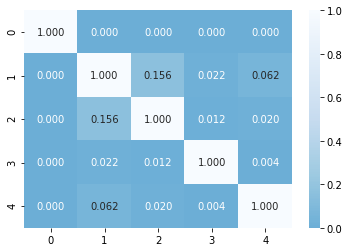

In [932]:
import pandas as pd
from time import time
TiempoTFIDFParalelo = time()

textoreal1Split=palabrasTextoLimpio("realNew1.txt")
textoreal2Split=palabrasTextoLimpio("realNew2.txt")

textofake1Split=palabrasTextoLimpio("fakeNew1.txt")
textofake2Split=palabrasTextoLimpio("fakeNew2.txt")

uniqueWords = set(vocabulario2).union(set(textoreal1Split)).union(set(textoreal2Split)).union(set(textofake1Split)).union(set(textofake2Split))

TFvocabulario = terminoFrecuencia(vocabulario)
TFtextoreal1 = terminoFrecuencia(textoreal1Split)
TFtextoreal2 = terminoFrecuencia(textoreal2Split)
TFtextofake1 = terminoFrecuencia(textofake1Split)
TFtextofake2 = terminoFrecuencia(textofake2Split)


idfs = computeIDF([TFvocabulario, TFtextoreal1, TFtextoreal2, TFtextofake1, TFtextofake2])

tfidfVocabulario = computeTFIDF(TFvocabulario, idfs)
tfidfTextoreal1 = computeTFIDF(TFtextoreal1, idfs)
tfidfTextoreal2 = computeTFIDF(TFtextoreal2, idfs)
tfidfTextofake1 = computeTFIDF(TFtextofake1, idfs)
tfidfTextofake2 = computeTFIDF(TFtextofake2, idfs)

tfidf = pd.DataFrame([tfidfVocabulario, tfidfTextoreal1, tfidfTextoreal2, tfidfTextofake1, tfidfTextofake2])
print("Matriz inversa TFIDF")
print(tfidf)

similaridad=obtieneCosine(tfidf)

porcentajeSimilaridad=list()

for i in range(0,1):
  suma=0
  for j in range(1,len(similaridad)):
      porcentajeSimilaridad.append(similaridad[i][j]*100)
  
print()
print("Matriz de Similaridades")
print(similaridad)

print()
print("Porcentaje similaridad de los Documentos")
print(porcentajeSimilaridad)



vocabularioFrecuencia=diccionarioLista(vocabulario)
matrizTDFFrecuencia=diccionarioLista(matriz2)

documentosTerminos=list()
documentosTerminos.append(len(matriz2))
documentosTerminos.append(len(matriz))

matrizPd=pd.Series(matriz2)
df = pd.DataFrame(matrizPd)
tamMatrizMB=(df.describe())
print("Matriz Describe MTDF")
print(tamMatrizMB)

with open("VocabularioFrecuencia.csv", 'w', newline='', encoding='utf-8') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerows(vocabularioFrecuencia)

np.savetxt("DocumentosTerminos.csv",documentosTerminos)
np.savetxt("TamMatrizMB.csv",tamMatrizMB)

with open("MatrizTermDocFrec.csv", 'w', newline='', encoding='utf-8') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerows(matrizTDFFrecuencia)

np.savetxt("Similaridades.csv",similaridad)
creacionMapaDeCalor(similaridad)
np.savetxt("PorcentajeSimilaridades.csv",porcentajeSimilaridad)

TiempoTFIDFFinalParalelo = time() - TiempoTFIDFParalelo

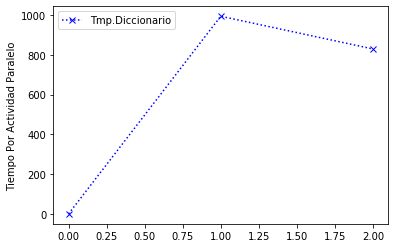

[0.4913005828857422, 994.0559041500092, 829.674150466919]
Tiempo Secuencial: 1824.2214 segundos.


In [933]:
from pylab import *
tiemposParalelo = [TiempoTFIDFFinalParalelo,TiempoMatrizTerminoDocumentoFinalParalelo,TiempoDiccionarioFinalParalelo]
#plt.plot(tiempos)   # Dibuja el gráfico
plt.plot(tiemposParalelo, marker='x', linestyle=':', color='b', label = "Tmp.Diccionario")
plt.legend(loc="upper left")

plt.ylabel("Tiempo Por Actividad Paralelo")   # Inserta el título del eje Y
plt.show()
print(tiemposParalelo)
print("Tiempo Secuencial: %.4f segundos." % (tiemposParalelo[0]+tiemposParalelo[1]+tiemposParalelo[2]))

Text(0.5, 1.0, 'Tiempos Por Actividad ')

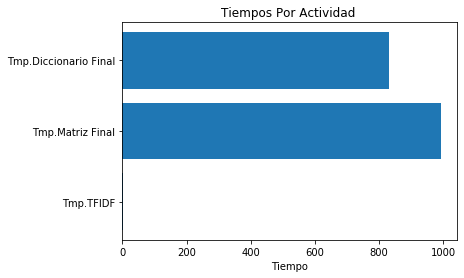

In [934]:
actividad = ("Tmp.TFIDF", "Tmp.Matriz Final", "Tmp.Diccionario Final")
posicion_y = np.arange(len(actividad))
plt.barh(posicion_y, tiemposParalelo, align = "center")
plt.yticks(posicion_y, actividad)
plt.xlabel('Tiempo')
plt.title("Tiempos Por Actividad ")

In [867]:
#Grafico de Los dos Tiempos

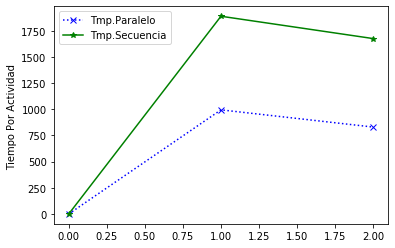

Tiempos En Secuencial:[0.5950303077697754, 1887.7178809642792, 1674.562597990036]
Tiempos En Paralelo:[0.4913005828857422, 994.0559041500092, 829.674150466919]
Tiempo Total Secuencial: 3562.8755 segundos.
Tiempo Total Paralelo: 1824.2214 segundos.


In [935]:


#plt.plot(tiempos)   # Dibuja el gráfico
plt.plot(tiemposParalelo, marker='x', linestyle=':', color='b', label = "Tmp.Paralelo")
plt.plot(tiemposSecuencial, marker='*', linestyle='-', color='g', label = "Tmp.Secuencia")
plt.legend(loc="upper left")

plt.ylabel("Tiempo Por Actividad ")   # Inserta el título del eje Y
plt.show()

print('Tiempos En Secuencial:'+str(tiemposSecuencial))
print('Tiempos En Paralelo:'+str(tiemposParalelo))
print("Tiempo Total Secuencial: %.4f segundos." % (tiemposSecuencial[0]+tiemposSecuencial[1]+tiemposSecuencial[2]))
print("Tiempo Total Paralelo: %.4f segundos." % (tiemposParalelo[0]+tiemposParalelo[1]+tiemposParalelo[2]))

Text(0.5, 1.0, 'Tiempos Por Actividad ')

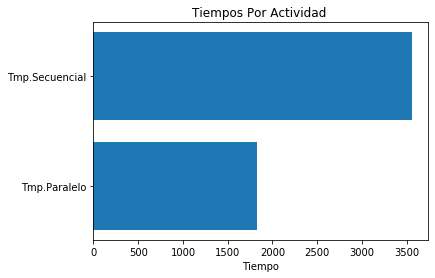

In [938]:
Total={tiemposSecuencial[0]+tiemposSecuencial[1]+tiemposSecuencial[2],tiemposParalelo[0]+tiemposParalelo[1]+tiemposParalelo[2]}
actividad = ("Tmp.Paralelo", "Tmp.Secuencial")
posicion_y = np.arange(len(actividad))
plt.barh(posicion_y, Total, align = "center")
plt.yticks(posicion_y, actividad)
plt.xlabel('Tiempo')
plt.title("Tiempos Por Actividad ")